Создание веб-сервиса с моделью с помощью FastAPI

 Создайте веб-сервис с помощью FastAPI, загрузите на него обученную модель MNIST и протестируйте ее на собственноручно написанных цифрах.




In [ ]:
# Ваше решение

In [ ]:
# Загружаем базу mnist
from tensorflow.keras.datasets import mnist 

# Сеть прямого распространения
from tensorflow.keras.models import Sequential 

# Базовые слои для счёрточных сетей
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

# оптимизаторы
from tensorflow.keras.optimizers import Adam, Adadelta 

# Используем для to_categorical
from tensorflow.keras import utils 

# Для отрисовки изображений
from tensorflow.keras.preprocessing import image 

# Для загрузки своей картинки
from google.colab import files 

# Библиотека работы с массивами
import numpy as np 

# Для отрисовки графиков
import matplotlib.pyplot as plt 

# Для отрисовки изображений
from PIL import Image 

# Для генерации случайных чисел 
import random 

# Для округления
import math 

#Для работы с файлами 
import os 

# подключем диск
#from google.colab import drive

%matplotlib inline

In [ ]:
# загрузка всего датасет MNIST
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()  

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# подготовка набора экземпляров класса
# Превращаем y_train и y_test сетей в формат one hot encoding

y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)

# Меняем формат данных MNIST
# Надо добавить в конце размерность 1
# Чтобы свёрточная сеть понимала, что это чёрно-белые данные

x_train = x_train_org.reshape(x_train_org.shape[0], 28, 28, 1)
x_test = x_test_org.reshape(x_test_org.shape[0], 28, 28, 1)

In [ ]:
# проверка размерностей

print(x_train.shape)
print(y_train.shape)  

(60000, 28, 28, 1)
(60000, 10)


19216
15231
32212
17062
47033
47433
38371
15643
9537
14010


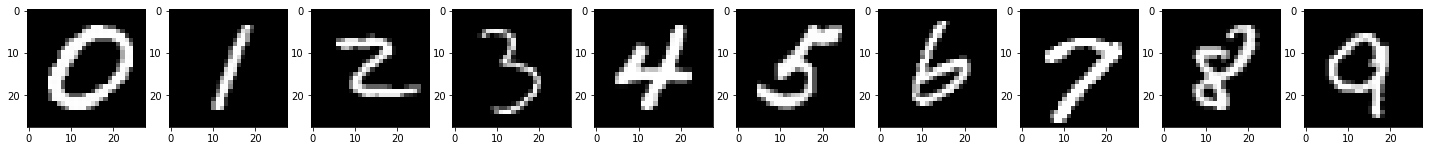

In [ ]:
# Выводим для примера картинки по каждому классу

fig, axs = plt.subplots(1, 10, figsize=(25, 3)) # Создаем полотно из 10 графиков

for i in range(10): # Проходим по классам от 0 до 9
  label_indexes = np.where(y_train_org==i)[0] # Получаем список из индексов положений класса i в y_train
  index = random.choice(label_indexes) # Случайным образом выбираем из списка индекс
  img = x_train_org[index] # Выбираем из x_train нужное изображение
  axs[i].imshow(Image.fromarray(img), cmap='gray') #Отображаем изображение i-ым графиков
  print(index)
plt.show() # Показываем изображения

In [ ]:
# задаём batch_size
batch_size = 128 

# Создаем последовательную модель

model = Sequential()

model.add(BatchNormalization(input_shape=(28, 28, 1))) # Слой пакетной нормализации
model.add(Conv2D(32, (3, 3), padding='same', activation='relu')) # Первый сверточный слой
model.add(Conv2D(16, (3, 3), padding='same', activation='relu')) # Второй сверточный слой
model.add(MaxPooling2D(pool_size=(2, 2))) # Первый слой подвыборки

model.add(Dropout(0.25)) # Слой регуляризации Dropout
model.add(Flatten())

model.add(Dense(256, activation='relu')) # Полносвязный слой для классификации
model.add(Dropout(0.25)) # Слой регуляризации Dropout
model.add(Dense(10, activation='softmax')) # Выходной полносвязный слой

# Компилируем сеть
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

Epoch 1/15
469/469 [==============================] - 141s 300ms/step - loss: 0.1869 - accuracy: 0.9415 - val_loss: 0.0505 - val_accuracy: 0.9828
Epoch 2/15
469/469 [==============================] - 119s 253ms/step - loss: 0.0609 - accuracy: 0.9815 - val_loss: 0.0391 - val_accuracy: 0.9860
Epoch 3/15
469/469 [==============================] - 108s 230ms/step - loss: 0.0407 - accuracy: 0.9870 - val_loss: 0.0302 - val_accuracy: 0.9895
Epoch 4/15
469/469 [==============================] - 107s 228ms/step - loss: 0.0326 - accuracy: 0.9897 - val_loss: 0.0288 - val_accuracy: 0.9903
Epoch 5/15
469/469 [==============================] - 107s 228ms/step - loss: 0.0275 - accuracy: 0.9910 - val_loss: 0.0275 - val_accuracy: 0.9898
Epoch 6/15
469/469 [==============================] - 107s 228ms/step - loss: 0.0251 - accuracy: 0.9916 - val_loss: 0.0301 - val_accuracy: 0.9903
Epoch 7/15
469/469 [==============================] - 121s 258ms/step - loss: 0.0189 - accuracy: 0.9937 - val_loss: 0.0277 -

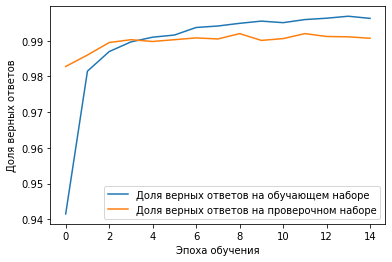

In [ ]:
# Обучаем сеть на данных mnist

history = model.fit(x_train, 
                    y_train, 
                    batch_size=batch_size, 
                    epochs=15,
                    validation_data=(x_test, y_test),
                    verbose=1)

# Отображаем график точности обучения

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [ ]:
model.save('model_minst.h5')

In [ ]:
model.save('/content/drive/MyDrive/NN/model_minst.h5')

In [ ]:
import keras
model=keras.models.load_model('/content/drive/MyDrive/NN/model_minst.h5')

In [ ]:
def process(image_file):
    #image = Image.open(image_file)  # Открытие обрабатываемого файла
    resized_image = image_file#image.resize((28, 28))          # Изменение размера изображения в соответствии со входом сети
    array = np.array(resized_image)#[..., 0][np.newaxis, ...]   # Регулировка формы тензора для подачи в сеть
    prediction = np.argmax(model.predict(array[np.newaxis, ...]))             # Запуск предсказания сети
    return prediction

In [ ]:
print(x_train[0].shape)

(28, 28, 1)


In [ ]:
print(process(x_train[0]))

5


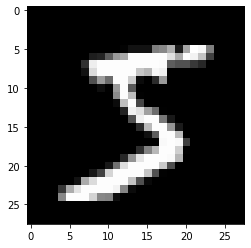

In [ ]:
plt.imshow(x_train[0].reshape(28,28),cmap='gray')
plt.show()

In [ ]:
predict_file = '''

from tensorflow.keras.models import load_model
import numpy as np
from io import BytesIO
from PIL import Image 

model = load_model('model_minst.h5')  # Инициализация модели

def process(image_file,invert):
    image = Image.open(BytesIO(image_file)).convert('L')  # Открытие обрабатываемого файла
    resized_image = image.resize((28, 28))          # Изменение размера изображения в соответствии со входом сети
    array = np.array(resized_image,dtype=float)
    print(invert)
    if(invert==True):
      array=255-array
    print(array.shape, np.sum(array))
    array2 = array.reshape(1,28,28,1)
    print(array2.shape)
    predict=model.predict(array2)
    print(predict)
    prediction = np.argmax(predict)             # Запуск предсказания сети
    print(prediction)
    return prediction

'''

# Сохранение кода в файл
with open('predict.py', 'w') as file:
    file.write(predict_file)

In [ ]:
    image=keras.preprocessing.image.load_img('/content/drive/My Drive/NN/Numbers2/'+str(Names[0]), target_size=(28, 28), color_mode = 'grayscale')
    #image = Image.open('/content/drive/My Drive/NN/Numbers2/'+str(Names[0]), color_mode = 'grayscale')  # Открытие обрабатываемого файла
    resized_image = image.resize((28, 28))          # Изменение размера изображения в соответствии со входом сети
    array = np.array(resized_image,dtype=float)
    print(array.shape)

(28, 28)


In [ ]:
array = np.array(x_test[0],dtype=float)
print({"result": np.argmax(model.predict(array.reshape(1,28,28,1)))  })

{'result': 7}


In [ ]:
main_file = '''from fastapi import FastAPI, File
from predict import process

app = FastAPI()


@app.post("/predict")
async def create_file(file: bytes = File(...),invert: bool=True):
    #print(invert)
    result=process(file,invert)
    print(result)
    return {"result": str(result)}
'''

with open('main.py', 'w') as file:
    file.write(main_file)

In [ ]:
proc_file = 'web: uvicorn main:app --host=0.0.0.0 --port=${PORT:-5000}'

with open('Procfile', 'w') as file:
    file.write(proc_file)

In [ ]:
requirements_file = '''

fastapi==0.68.1
tensorflow-cpu==2.5.0
uvicorn==0.15.0
Pillow==7.1.2
python-multipart==0.0.5

'''

with open('requirements.txt', 'w') as file:
    file.write(requirements_file)

In [ ]:
!git --version

git version 2.17.1


In [ ]:
!git config --global user.email "zadrutskiy@yandex.ru"
!git config --global user.name "A1171"

In [ ]:
!curl https://cli-assets.heroku.com/install-ubuntu.sh | sh > /dev/null

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1232  100  1232    0     0  23245      0 --:--:-- --:--:-- --:--:-- 23245
+ dpkg -s apt-transport-https
+ echo 
+ apt-get update
+ apt-get install -y apt-transport-https
+ echo deb https://cli-assets.heroku.com/apt ./
+ dpkg -s heroku-toolbelt
+ true
+ curl https://cli-assets.heroku.com/apt/release.key
+ apt-key add -
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0Warning: apt-key output should not be parsed (stdout is not a terminal)
100  5393  100  5393    0     0  36687      0 --:--:-- --:--:-- --:--:-- 36687
+ apt-get update
+ apt-get install -y heroku
 ›   Warning: Our terms of service have changed: 
 ›   https://dashboard.heroku.com/t

In [ ]:
!heroku --version

heroku/7.59.2 linux-x64 node-v12.21.0


In [ ]:
LOGIN = 'zadrutskiy@zandex.ru'  # Укажите свой логин
API_KEY = '9c6fcbfb-acb2-46c6-924c-7d5079f78732'  # Укажите свой API-key
           

auth_file = '''machine api.heroku.com
  login {login}
  password {password}
machine git.heroku.com
  login {login}
  password {password}
'''.format(login=LOGIN, password=API_KEY)

with open('/root/.netrc', 'w') as file:
    file.write(auth_file)

In [ ]:
!git init

Initialized empty Git repository in /content/.git/


In [ ]:
!git add model_minst.h5
!git add predict.py
!git add main.py
!git add Procfile
!git add requirements.txt
!git add .config/

In [ ]:
!git commit -m "My first commit1"

[master (root-commit) d9ed5d3] My first commit1
 18 files changed, 686 insertions(+)
 create mode 100644 .config/.last_opt_in_prompt.yaml
 create mode 100644 .config/.last_survey_prompt.yaml
 create mode 100644 .config/.last_update_check.json
 create mode 100644 .config/active_config
 create mode 100644 .config/config_sentinel
 create mode 100644 .config/configurations/config_default
 create mode 100644 .config/gce
 create mode 100644 .config/logs/2021.12.03/14.32.30.027140.log
 create mode 100644 .config/logs/2021.12.03/14.32.50.522723.log
 create mode 100644 .config/logs/2021.12.03/14.33.09.955489.log
 create mode 100644 .config/logs/2021.12.03/14.33.16.964195.log
 create mode 100644 .config/logs/2021.12.03/14.33.36.903459.log
 create mode 100644 .config/logs/2021.12.03/14.33.37.701606.log
 create mode 100644 Procfile
 create mode 100644 main.py
 create mode 100644 model_minst.h5
 create mode 100644 predict.py
 create mode 100644 requirements.txt


In [ ]:
!git status

On branch master
Untracked files:
  (use "git add <file>..." to include in what will be committed)

	__pycache__/
	drive/
	nohup.out
	sample_data/
	x_test_org_0.jpeg

nothing added to commit but untracked files present (use "git add" to track)


In [ ]:
!heroku create minst-num-api-457356

Creating ⬢ minst-num-api-457356... ⣾ 
⣽⣻⢿⡿⣟⣯⣷⣾Creating ⬢ minst-num-api-457356... done
https://minst-num-api-457356.herokuapp.com/ | https://git.heroku.com/minst-num-api-457356.git


In [ ]:
!heroku authorizations:create

Creating OAuth Authorization... ⣾ 
⣽Creating OAuth Authorization... done
Client:      <none>
ID:          206dcdd7-e38a-4226-992a-8f58875f66a3
Description: Long-lived user authorization
Scope:       global
Token:       aa718364-2c27-44b4-be13-f244955f7c80
Updated at:  Fri Dec 17 2021 17:07:37 GMT+0000 (Coordinated Universal Time) (less than a minute ago)


In [ ]:
!heroku git:remote minst-num-api-457356

set git remote heroku to https://git.heroku.com/minst-num-api-457356.git


In [ ]:
!heroku apps:delete minst-num-api-457356

 ▸    WARNING: This will
 ▸    delete ⬢
 ▸    minst-num-api-457356
 ▸    including all add-ons.
 ▸    To proceed, type
 ▸    minst-num-api-457356
 ▸    or re-run this command
 ▸    with --confirm
 ▸    minst-num-api-457356

> minst-num-api-457356
Destroying ⬢ minst-num-api-457356 (including all add-ons)... ⣾ 
⣽⣻Destroying ⬢ minst-num-api-457356 (including all add-ons)... done


In [ ]:
!git remote -v

heroku	https://git.heroku.com/minst-num-api-457356.git (fetch)
heroku	https://git.heroku.com/minst-num-api-457356.git (push)


In [ ]:
!git push heroku master

Counting objects: 24, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (17/17), done.
Writing objects: 100% (24/24), 8.39 MiB | 7.29 MiB/s, done.
Total 24 (delta 3), reused 0 (delta 0)
remote: Compressing source files... done.
remote: Building source:
remote: 
remote: -----> Building on the Heroku-20 stack
remote: -----> Determining which buildpack to use for this app
remote: -----> Python app detected
remote: -----> No Python version was specified. Using the buildpack default: python-3.9.9
remote:        To use a different version, see: https://devcenter.heroku.com/articles/python-runtimes
remote: -----> Installing python-3.9.9
remote: -----> Installing pip 21.3.1, setuptools 57.5.0 and wheel 0.37.0
remote: -----> Installing SQLite3
remote: -----> Installing requirements with pip
remote:        Collecting fastapi==0.68.1
remote:          Downloading fastapi-0.68.1-py3-none-any.whl (52 kB)
remote:        Collecting tensorflow-cpu==2.5.0
remote:          Download

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


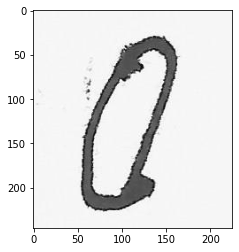

In [ ]:
Names=["00.png","01.png","02.png","03.png","04.png","05.png","06.png","07.png","08.png","09.png"]
img = Image.open('/content/drive/My Drive/NN/Numbers2/'+str(Names[0])).convert('L')
Picturies=np.array(img)
plt.imshow(Picturies,cmap='gray')  
plt.show()

(10, 28, 28, 1)


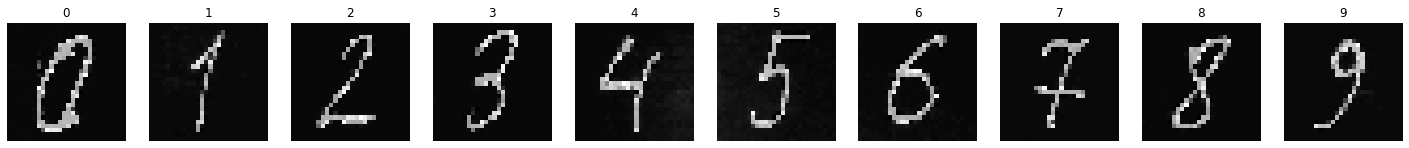

[0 1 2 3 4 5 6 7 8 9]


In [ ]:
import keras
#Ручкой на белом листе 
Names=["00.png","01.png","02.png","03.png","04.png","05.png","06.png","07.png","08.png","09.png"]
Picturies=list()
for i in range(10):
  img=keras.preprocessing.image.load_img('/content/drive/My Drive/NN/Numbers2/'+str(Names[i]), target_size=(28, 28), color_mode = 'grayscale') 
  img=keras.preprocessing.image.img_to_array(img)
  Picturies.append(img)
Picturies=np.array(Picturies)
#Picturies=Picturies.astype('float32') / 255
print(np.shape(Picturies))
#invert
Picturies=255-Picturies

fig, axs = plt.subplots(1, 10, figsize=(25, 5))
for i in range(10):
    axs[i].set_title(str(i))
    axs[i].imshow(Picturies[i,:,:,0],cmap='gray')  
    axs[i].axis('off')
# Отрисовка всего полотна
plt.show()
#Picturies1 = Picturies.reshape(Picturies.shape[0], -1)   
Predict=model.predict(Picturies)
print(np.argmax(Predict,axis=0))
#print(Predict)

In [ ]:
import requests
for i in range(10):
  files = {'file':  open('/content/drive/My Drive/NN/Numbers2/'+str(Names[i]),'rb')}
  #r = requests.post('http://127.0.0.1:8000/predict', files=files,params={'invert':True})
  r = requests.post('https://minst-num-api-457356.herokuapp.com/predict', files=files,params={'invert':True})
  print(r.status_code,r.json())

200 {'result': '0'}
200 {'result': '1'}
200 {'result': '2'}
200 {'result': '3'}
200 {'result': '4'}
200 {'result': '5'}
200 {'result': '6'}
200 {'result': '7'}
200 {'result': '8'}
200 {'result': '9'}


In [ ]:
!heroku logs

2021-12-17T17:18:27.808486+00:00 app[web.1]: INFO:     Waiting for application startup.
2021-12-17T17:18:27.808667+00:00 app[web.1]: INFO:     Application startup complete.
2021-12-17T17:18:28.013182+00:00 heroku[web.1]: State changed from starting to up
2021-12-17T17:18:47.000000+00:00 app[api]: Build succeeded
2021-12-17T17:20:27.253169+00:00 app[web.1]: True
2021-12-17T17:20:27.253450+00:00 app[web.1]: (28, 28) 23424.0
2021-12-17T17:20:27.253451+00:00 app[web.1]: (1, 28, 28, 1)
2021-12-17T17:20:27.300701+00:00 app[web.1]: 2021-12-17 17:20:27.300629: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-12-17T17:20:27.301074+00:00 app[web.1]: 2021-12-17 17:20:27.301041: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2499995000 Hz
2021-12-17T17:20:27.460332+00:00 app[web.1]: [[6.8499088e-01 1.5742916e-01 8.7347906e-04 1.1581632e-03 4.6828709e-04
2021-12-17T17:20:27.460359+00:00 ap

In [ ]:
#Дальше эксперименты, можно не смотреть

In [ ]:
from PIL import Image
import requests
im = Image.fromarray(x_test[2].reshape(28,28))
im.save("x_test_org_0.jpeg")
files = {'file': open('x_test_org_0.jpeg','rb')}
r = requests.post('https://minst-num-api-457356.herokuapp.com/predict', files=files, data={'invert':'True'})
print(r.status_code)
print(r.json())

200
{'result': '1'}


In [ ]:
for i in range(10):
    axs[i].set_title(str(i))
    axs[i].imshow(Picturies[i,:,:,0],cmap='gray')  
    axs[i].axis('off')
# Отрисовка всего полотна
plt.show()
#Picturies1 = Picturies.reshape(Picturies.shape[0], -1)   
Predict=model.predict(Picturies)
print(np.argmax(Predict,axis=1))

In [ ]:
files = {'file': open('/content/drive/My Drive/NN/Numbers2/'+str(Names[2]),'rb'),'invert':'True'}
r = requests.post('https://minst-num-api-457356.herokuapp.com/predict', files=files)
print(r.status_code)
print(r.json())

200
{'result': '6'}


In [ ]:
!pip install fastapi
!pip install uvicorn
!pip install python-multipart

     |████████████████████████████████| 51 kB 630 kB/s 
     |████████████████████████████████| 61 kB 259 kB/s 
     |████████████████████████████████| 10.1 MB 43.9 MB/s 
     |████████████████████████████████| 78 kB 7.4 MB/s 
     |████████████████████████████████| 54 kB 3.2 MB/s 
     |████████████████████████████████| 54 kB 2.9 MB/s 
  Created wheel for python-multipart: filename=python_multipart-0.0.5-py3-none-any.whl size=31678 sha256=68853c9347dd50dfabd8617df78b79add96c9a07a2bbd4aeb0c5dcc79003c8ef
  Stored in directory: /root/.cache/pip/wheels/2c/41/7c/bfd1c180534ffdcc0972f78c5758f89881602175d48a8bcd2c
Successfully built python-multipart


In [ ]:
main_file = '''from fastapi import FastAPI, File
from predict import process

app = FastAPI()


@app.post("/predict")
async def create_file(file: bytes = File(...),invert: bool=True):
    #print(invert)
    result=process(file,invert)
    print(result)
    return {"result": str(result)}
'''

with open('main.py', 'w') as file:
    file.write(main_file)

In [ ]:
='False'

In [ ]:
!nohup uvicorn main:app --reload &

nohup: appending output to 'nohup.out'


In [ ]:
!cat nohup.out

INFO:     Will watch for changes in these directories: ['/content']
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
INFO:     Started reloader process [382] using statreload
Process SpawnProcess-1:
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/uvicorn/subprocess.py", line 76, in subprocess_started
    target(sockets=sockets)
  File "/usr/local/lib/python3.7/dist-packages/uvicorn/server.py", line 68, in run
    return asyncio.run(self.serve(sockets=sockets))
  File "/usr/lib/python3.7/asyncio/runners.py", line 43, in run
    return loop.run_until_complete(main)
  File "/usr/lib/python3.7/asyncio/base_events.py", line 587, in run_until_complete
    return future.result()
  File "/usr/local/lib/python3.7/dist-packages/

In [ ]:
import requests

In [ ]:
#19216 15231 32212 17062 47033 47433 38371 15643 9537 14010
from PIL import Image
import requests
im = Image.fromarray(x_train[15231].reshape(28,28))
im.save("x_test_org_0.jpeg")
#files = {'file': open('x_test_org_0.jpeg','rb')}
for i in range(10):
  files = {'file':  open('/content/drive/My Drive/NN/Numbers2/'+str(Names[i]),'rb')}
  r = requests.post('http://127.0.0.1:8000/predict', files=files,params={'invert':True})
  print(r.status_code,r.json())

200 {'result': '0'}
200 {'result': '1'}
200 {'result': '2'}
200 {'result': '3'}
200 {'result': '4'}
200 {'result': '5'}
200 {'result': '6'}
200 {'result': '7'}
200 {'result': '8'}
200 {'result': '9'}


In [ ]:
print(r.request.body)

b'--1481c04d2d205d9631d97be2d255ddf2\r\nContent-Disposition: form-data; name="invert"\r\n\r\n1\r\n--1481c04d2d205d9631d97be2d255ddf2\r\nContent-Disposition: form-data; name="file"; filename="x_test_org_0.jpeg"\r\n\r\n\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xc0\x00\x0b\x08\x00\x1c\x00\x1c\x01\x01\x11\x00\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa

In [ ]:
r = requests.get('http://127.0.0.1:8000/test')
print(r.status_code)
print(r.text)

ConnectionError: ignored